In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import joblib

plt.style.use('seaborn-darkgrid')

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,precision_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [2]:
def cleanDataFunction(csvfileName):
  #Reading Data
  df = pd.read_csv(csvfileName)
  
  print(f"Data has {df.shape[0]} Rows and {df.shape[1]} Features")
 
  df.info() #all Dtype are float64
  df.describe()
  
  df = df.astype('int') #convert the data to int type because Integer arithmetic is faster
  df.isna().sum()

  print('###### BEFORE ######')
  print(df.duplicated().value_counts())# Count of duplicated Rows

  duplicates = df[df.duplicated()]
  print("Duplicate Rows : ",len(duplicates))
  print(duplicates['Diabetes_binary'].value_counts())

  df = df.drop_duplicates(subset=None, keep="first", inplace=False) #because the data is unbalanced

  print('###### AFTER ######')
  print(df.duplicated().value_counts())

  print('###### AMOUT OF ZEROS AND ONES ######')
  sns.countplot(x='Diabetes_binary',data=df)
  print(df['Diabetes_binary'].value_counts(normalize=True)*100)
    
  return df

In [3]:
def removeUnneccessaryColumns(df):
  #Droping unnecessary columns
  newData  = df.copy()
  newData.drop(['Education','Income'], axis = 1, inplace=True)
  newData.to_csv('DataWithColumnsDropped.csv')
  newData.columns
  return newData

In [4]:
#correlation
def featureSelectionCorrelation(df):
  plt.figure(figsize = (10,6))
  sns.heatmap(df.corr(), vmax = 0.9, square = True)
  plt.title("Correlations")
  # plt.show()

  #Feature selection
  correlation = df.corr()
  updatedData = pd.DataFrame()
  cnt = 0
  for i in range (len(correlation['Diabetes_binary'])):
      if abs(correlation['Diabetes_binary'][i]) >= 0.05:
          myColumn = df[df.columns[i] ]
          updatedData.insert(cnt,df.columns[i],myColumn)
          cnt = cnt+1
  return updatedData


In [1]:
def main(classifier ,X_train, X_test, y_train, y_test):
  y_train_pred = classifier.predict(X_train)
  y_test_pred = classifier.predict(X_test)

  #Training Data Set
  print("\n-----------TRAINING DATA-----------")
  AccScore = accuracy_score(y_train, y_train_pred)
  F1Score=f1_score(y_train, y_train_pred,average='weighted')
  PrecisionScore = precision_score(y_train, y_train_pred, average='weighted')
  print("Accuracy Score: ",AccScore*100)
  print('Precision Score is : ', PrecisionScore*100)
  print("F1-Score: ",F1Score*100)

  CM = confusion_matrix(y_train, y_train_pred)
  print('Confusion Matrix is : \n', CM)
  #drawing confusion matrix
  plt.figure(figsize = (8,6))
  sns.heatmap(CM, center = True, fmt = ".0f", cmap = 'viridis')
  plt.show()


  print("\n-----------TESTING DATA-----------")
  #Testing Data Set
  AccScore = accuracy_score(y_test, y_test_pred)
  F1Score=f1_score(y_test, y_test_pred,average='weighted')
  PrecisionScore = precision_score(y_test, y_test_pred, average='weighted')
  print("Accuracy Score: ",AccScore*100)
  print('Precision Score is : ', PrecisionScore*100)
  print("F1-Score: ",F1Score*100)

  CM = confusion_matrix(y_test, y_test_pred)
  print('Confusion Matrix is : \n', CM)
  # drawing confusion matrix
  plt.figure(figsize = (8,6))
  sns.heatmap(CM, center = True, fmt = ".0f", cmap = 'viridis')
  plt.show()

SyntaxError: invalid syntax (3138704902.py, line 16)

In [6]:
#Fitting Logistic Regression Model
def logisticModelFunction(index,X_train, X_test, y_train, y_test):
  classifier = LogisticRegression(C= 100, random_state= 0)
  classifier.fit(X_train, y_train)
  main(classifier ,X_train, X_test, y_train, y_test)
  
  joblib.dump(classifier, "LogisticModel"+index+".pkl")
  
  print("\nMODEL PREDICTION")
  my_model_loaded = joblib.load("LogisticModel"+index+".pkl")
  print(my_model_loaded.predict(X_test)[0:20])

In [7]:
#for Decision tree it returns the importance of each feature on the model
def Sort_Tuple(tup):
      return(sorted(tup, key = lambda x: x[1],reverse=True)) 

In [8]:
#Fitting Decision Tree Model
def decisionModelFunction(index,X_train, X_test, y_train, y_test,X):
  classifier = DecisionTreeClassifier(criterion= 'entropy')
  classifier = classifier.fit(X_train,y_train)
  main(classifier ,X_train, X_test, y_train, y_test)
  print('\n-----------------------------------------------\n')

  fun=lambda row: np.round((row * 100),2)
  features = fun(classifier.feature_importances_)
  
  print(pd.DataFrame(Sort_Tuple(list(zip(X.columns,features))),columns=['Feature', 'Importance (%)']))

  joblib.dump(classifier, "DecisionModel"+index+".pkl")
  
  print("\nMODEL PREDICTION")
  my_model_loaded = joblib.load("DecisionModel"+index+".pkl")
  print(my_model_loaded.predict(X_test)[0:20])


In [9]:
#Fitting Svm Model
def svmModelFunction (index,X_train, X_test, y_train, y_test):
  classifier = LinearSVC()
  classifier.fit(X_train, y_train)
  main(classifier ,X_train, X_test, y_train, y_test)
  joblib.dump(classifier, "svmModel"+index+".pkl")

  print("\nMODEL PREDICTION")
  my_model_loaded = joblib.load("svmModel"+index+".pkl")
  print(my_model_loaded.predict(X_test)[0:20])

In [10]:
def naiveBayesFunction(index,X_train, X_test, y_train, y_test):
  classifier = GaussianNB()
  classifier.fit(X_train, y_train)
  main(classifier,X_train, X_test, y_train, y_test)

  joblib.dump(classifier, "naive_bayesModel"+index+".pkl")
  
  print("\nMODEL PREDICTION")
  my_model_loaded = joblib.load("naive_bayesModel"+index+".pkl")
  print(my_model_loaded.predict(X_test)[0:20])

In [11]:

def randomForestFunction(index,X_train, X_test, y_train, y_test):
  classifier = RandomForestClassifier(random_state=10)

  classifier.fit(X_train, y_train)
  main(classifier,X_train, X_test, y_train, y_test)

  joblib.dump(classifier, "RandomForestClassifierModel"+index+".pkl")
  
  print("\nMODEL PREDICTION")
  my_model_loaded = joblib.load("RandomForestClassifierModel"+index+".pkl")
  print(my_model_loaded.predict(X_test)[0:20])

In [12]:


def bonusFunction(index,X_train, X_test, y_train, y_test):
 grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1,10,100,1000],'random_state':[0]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],'random_state':[0]}])
              #  ,(SVC(),[{'C': [0.1, 1, 10, 100, 1000],'gamma': [0.25,0.5,0.75,1,10,100],'kernel': ['rbf']}])
                ]

 for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=2)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

In [13]:
def modelCreationFunction(index,df):
    
  #OverSampling
  X = df.drop(['Diabetes_binary'],axis=1)
  y = df['Diabetes_binary']
  oversample = SMOTE()
  X, y = oversample.fit_resample(X, y)

  # Splitting data into training and test set:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
  # Creating StandardScaler instance
  sc = StandardScaler()
  # Fitting Standard Scaller
  X_train = sc.fit_transform(X_train)
  # Scaling data
  X_test = sc.transform(X_test)

  print("\n#Logistic Model#",index)
  logisticModelFunction(index,X_train, X_test, y_train, y_test)
  print("\n#Decision Model#",index)
  decisionModelFunction(index,X_train, X_test, y_train, y_test,X)
  print("\n#svm Model#",index)
  svmModelFunction (index,X_train, X_test, y_train, y_test)
  print("\n#naiveBayes Model#",index)
  naiveBayesFunction (index,X_train, X_test, y_train, y_test)
  print("\n#Random Forest Model#",index)
  randomForestFunction (index,X_train, X_test, y_train, y_test)
  print("\n#Compination Between Algorithms And Show Best Hyperparameter#",index)
  bonusFunction(index,X_train, X_test, y_train, y_test)


Data has 253680 Rows and 22 Features
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth        

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


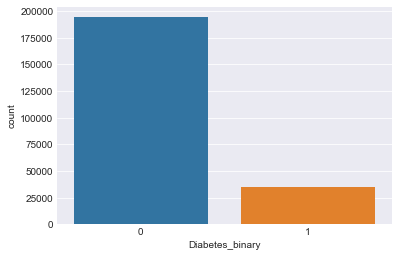

In [14]:
df = pd.DataFrame()
df = cleanDataFunction('D:/ai project/diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()



In [15]:
modelCreationFunction('1',df)


#Logistic Model# 1

-----------TRAINING DATA-----------
Accuracy Score:  72.59962122551873
Precision Score is :  72.62318850631408
F1-Score:  72.59223293056579
Confusion Matrix is : 
 [[110313  45134]
 [ 40082 115474]]

-----------TESTING DATA-----------
Accuracy Score:  72.77462669290428
Precision Score is :  72.80445941683968
F1-Score:  72.7667968308328
Confusion Matrix is : 
 [[27659 11271]
 [ 9897 28924]]

MODEL PREDICTION
[0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1]

#Decision Model# 1

-----------TRAINING DATA-----------
Accuracy Score:  99.14438124391083
Precision Score is :  99.14500170674958
F1-Score:  99.14437800546804
Confusion Matrix is : 
 [[153840   1607]
 [  1054 154502]]

-----------TESTING DATA-----------
Accuracy Score:  80.78738537124924
Precision Score is :  81.12119355653759
F1-Score:  80.73754405901119
Confusion Matrix is : 
 [[29456  9474]
 [ 5464 33357]]

-----------------------------------------------

                 Feature  Importance (%)
0                   

In [ ]:
# df = removeUnneccessaryColumns(df)
# modelCreationFunction('2',df)


In [ ]:
# df = featureSelectionCorrelation(df)
# modelCreationFunction('3',df)
